In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
recipes = pd.read_json('train.json/train.json')

In [3]:
recipes.shape

(39774, 3)

In [4]:
recipes.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
recipes.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [6]:
recipes['id'].nunique()

39774

In [7]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


***Cuisines***

In [8]:
recipes['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]), <a list of 10 Text yticklabel objects>)

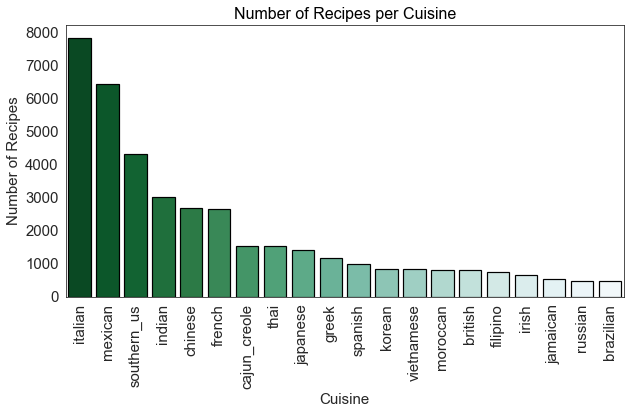

In [180]:
plt.figure(figsize=(10, 5))
sns.set_style('white')
sns.countplot( x='cuisine', data = recipes, order = recipes['cuisine'].value_counts(ascending=False).index, linewidth=1.2,
        edgecolor='black', alpha=1, palette = 'BuGn_r')
plt.title('Number of Recipes per Cuisine', size=16, color = 'black')
plt.xlabel('Cuisine', size=15)
plt.ylabel('Number of Recipes', size=15)
plt.savefig('number_per_cuisine.png')
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)

***Looking at the number of ingredients per recipe and cuisine***

In [10]:
recipes['n_ingredients'] = recipes['ingredients'].str.len()

In [11]:
gby_cuisine = recipes.groupby(recipes['cuisine'])

In [12]:
gby = gby_cuisine['n_ingredients'].agg({'n_recipes' : np.size,'avgn_ingredients' : np.mean})

C:\Users\Gohar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [13]:
gby = gby.reset_index()

In [14]:
gby.sort_values('avgn_ingredients', ascending = False, inplace = True)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

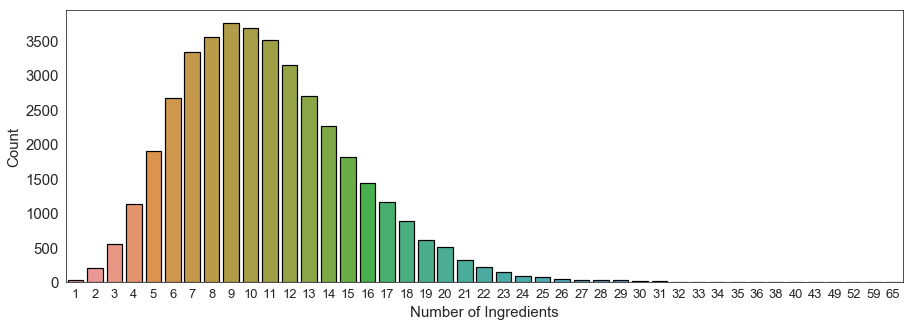

In [181]:
plt.figure(figsize=(15, 5))
sns.set_style('white')
sns.countplot(recipes['n_ingredients'], 
               linewidth=1.2,
        edgecolor='black', alpha=1, tick_label='cuisine')
plt.title('', size=16, color = 'black')
plt.xlabel('Number of Ingredients', size=15)
plt.ylabel('Count', size=15)
plt.savefig('n_ingredients_ditsr.png')
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text yticklabel objects>)

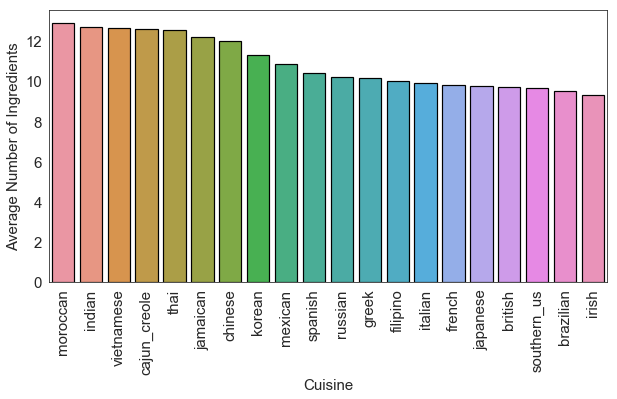

In [185]:
plt.figure(figsize=(10, 5))
sns.set_style('white')
g = sns.barplot(gby['cuisine'], gby['avgn_ingredients'], 
               linewidth=1.2,
        edgecolor='black', alpha=1, tick_label='cuisine')
plt.title('', size=16, color = 'black')
plt.xlabel('Cuisine', size=15)
plt.ylabel('Average Number of Ingredients', size=15)
plt.savefig('number_per_cuisine.png')
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text yticklabel objects>)

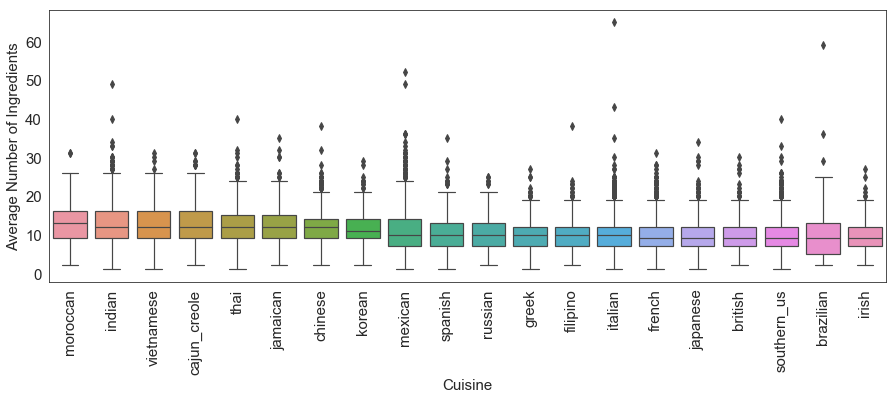

In [182]:
plt.figure(figsize=(15, 5))
sns.set_style('white')
g = sns.boxplot(recipes['cuisine'], recipes['n_ingredients'], order = gby['cuisine'],
               linewidth=1.2)
plt.title('', size=16, color = 'black')
plt.xlabel('Cuisine', size=15)
plt.ylabel('Average Number of Ingredients', size=15)
plt.savefig('number_per_cuisine.png')
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)

In [22]:
longest_recipe = recipes[recipes['n_ingredients'] == max(recipes['n_ingredients'])]

In [23]:
longest_recipe.values

array([['italian', 3885,
        list(['fettucine', 'fresh marjoram', 'minced garlic', 'olive oil', 'garlic powder', 'large eggs', 'Alfredo sauce', 'vegetable oil', 'cajun seasoning', 'shredded romano cheese', 'basil dried leaves', 'salt', 'cayenne pepper', 'scallions', 'red bell pepper', 'boneless skinless chicken breast halves', 'soba', 'pasta sauce', 'kosher salt', 'milk', 'fresh ginger', 'ground black pepper', 'flour', 'cooked chicken', 'coarse salt', 'lemon', 'diced tomatoes', 'garlic', 'rice vinegar', 'NeufchÃ¢tel', 'garlic cloves', 'dried parsley', 'frozen artichoke hearts', 'penne', 'pepper', 'sweet onion', 'part-skim mozzarella cheese', 'parmigiano reggiano cheese', 'basil leaves', 'onion powder', 'red wine vinegar', 'red pepper flakes', 'orzo', 'crushed red pepper', 'all-purpose flour', 'freshly ground pepper', 'sliced mushrooms', 'panko breadcrumbs', 'plum tomatoes', 'fresh basil', 'fresh leav spinach', 'water', 'sun-dried tomatoes', 'ground pepper', 'grated parmesan cheese'

In [44]:
recipes.sort_values('n_ingredients', ascending = False)[0:10]

,cuisine,id,ingredients,n_ingredients
15289,italian,3885,"[fettucine, fresh marjoram, minced garlic, oli...",65
30350,brazilian,13430,"[marshmallows, fresh corn, cheddar cheese, shr...",59
26103,mexican,13049,"[vanilla ice cream, lime, garlic powder, zucch...",52
10513,mexican,49282,"[condensed cream of chicken soup, pepper, refr...",49
22906,indian,2253,"[white vinegar, sparkling lemonade, coconut su...",49
31250,italian,29216,"[eggs, warm water, pepper, dried basil, unsalt...",43
345,thai,45039,"[fish sauce, hot red pepper flakes, cider vine...",40
6449,southern_us,6548,"[canned black beans, seasoned bread crumbs, pr...",40
3359,indian,21624,"[red chili peppers, fresh coriander, fresh gin...",40
10379,chinese,9077,"[low sodium soy sauce, water, ground black pep...",38


In [46]:
len(recipes[recipes['n_ingredients'] == 1])

22

In [45]:
recipes[recipes['n_ingredients'] == 1]

,cuisine,id,ingredients,n_ingredients
940,japanese,4734,[sushi rice],1
2088,vietnamese,7833,[dried rice noodles],1
6787,indian,36818,[plain low-fat yogurt],1
7011,indian,19772,[unsalted butter],1
8181,japanese,16116,[udon],1
8852,thai,29738,[sticky rice],1
8990,indian,41124,[butter],1
10506,mexican,32631,[corn tortillas],1
13178,thai,29570,[grained],1
17804,southern_us,29849,[lemonade concentrate],1


In [186]:
ingr_count = {}
for c in recipes['cuisine'].unique():
    ingr_count[c] = Counter()
    ind = (recipes['cuisine'] == c)
    for ing in recipes[ind]['ingredients']:
        ingr_count[c].update(ing)

In [187]:
ingr_count['greek'].most_common(5)

[('salt', 572),
 ('olive oil', 504),
 ('dried oregano', 267),
 ('garlic cloves', 254),
 ('feta cheese crumbles', 252)]

In [188]:
ingr_count['italian'].most_common(5)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471)]

In [189]:
len(ingr_count['italian'].keys())

2929

In [190]:
n_ingr = []
for cuis in ingr_count.keys():
    n_ingr.append(len(ingr_count[cuis].keys()))

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

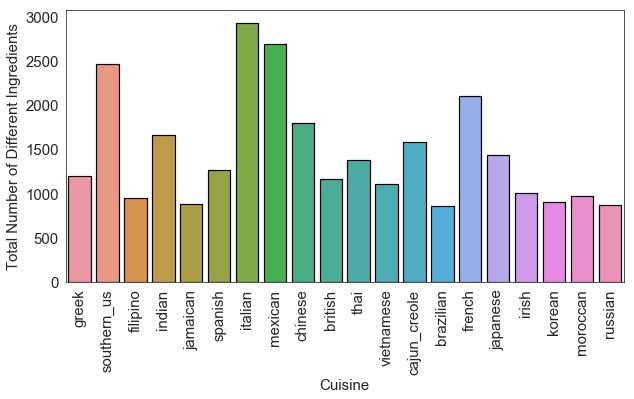

In [191]:
plt.figure(figsize=(10, 5))
sns.set_style('white')
sns.barplot(x=list(counters.keys()),y=n_ingr, linewidth=1.2,
        edgecolor='black', alpha=1)
plt.title('', size=16)
plt.xlabel('Cuisine', size=15)
plt.ylabel('Total Number of Different Ingredients', size=15)
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text yticklabel objects>)

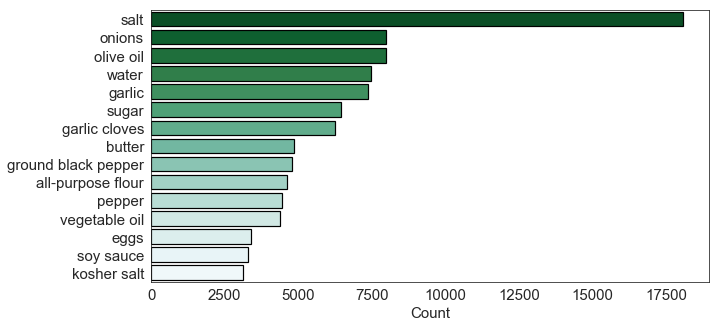

In [184]:
plt.figure(figsize=(10, 5))
sns.set_style('white')
sns.barplot(x= [i[1] for i in most_comm], y=[i[0] for i in most_comm], linewidth=1.2,
        edgecolor='black', alpha=1, palette = 'BuGn_r')
plt.title('', size=16)
plt.xlabel('Count', size=15)
plt.ylabel('', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)